# A simple engine for image searching: A [SimilaritySearch.jl](https://github.com/sadit/SimilaritySearch.jl) tutorial
## MNIST
by: Eric S. Tellez


## Installing packages
As usual, the first step consists on initializing the environment

In [1]:
using Pkg
pkg"activate ."
# pkg"add Printf MLDatasets LinearAlgebra Images StatsBase StatsPlots https://github.com/sadit/SimilaritySearch.jl"
using Printf, MLDatasets, MLDataUtils, LinearAlgebra, Images, StatsBase, StatsPlots, Statistics, SimilaritySearch


  Activating environment at `~/Research/SimilaritySearchExamples/classification/Project.toml`


## Loading benchmarks
Here we use the [MNIST](https://juliaml.github.io/MLDatasets.jl/latest/datasets/MNIST/) dataset (loaded with MLDatasets).

## About preparing the data
As `SimilaritySearch.jl` works with several data types, we decide to work directly on the matrix input; however, we convert each image to a vector of Float32 values to achieve a small speedup and, mainly, to avoid overflow problems on direct computation over the `MLDatasets.jl`'s numeric encoding of both _MNIST_ and _Fashion-MNIST_.

In [2]:
function load_data()
    #train_X, train_y = FashionMNIST.traindata()
    #test_X, test_y = FashionMNIST.testdata()
    
    train_X, train_y = MNIST.traindata()
    test_X, test_y = MNIST.testdata()
    
    #vec(X, i) = Float32.(reshape(view(X, :, :, i), 28 * 28)) |> normalize!
    vec(X, i) = Float32.(view(X, :, :, i))
    
    X = [vec(train_X, i) for i in 1:60000]
    queries = [vec(test_X, i) for i in 1:10000]

    le = labelenc(train_y)
    train_y = label2ind.(train_y, le)
    test_y = label2ind.(test_y, le)
    (train_X=X, train_y=train_y, test_X=queries, test_y=test_y)
end

D = load_data()
size(D.train_X), size(D.test_X), typeof(D.train_X)

This program has requested access to the data dependency MNIST.
which is not currently installed. It can be installed automatically, and you will not see this message again.

Dataset: THE MNIST DATABASE of handwritten digits
Authors: Yann LeCun, Corinna Cortes, Christopher J.C. Burges
Website: http://yann.lecun.com/exdb/mnist/

[LeCun et al., 1998a]
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner.
    "Gradient-based learning applied to document recognition."
    Proceedings of the IEEE, 86(11):2278-2324, November 1998

The files are available for download at the offical
website linked above. Note that using the data
responsibly and respecting copyright remains your
responsibility. The authors of MNIST aren't really
explicit about any terms of use, so please read the
website to make sure you want to download the
dataset.



Do you want to download the dataset from ["http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz", "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyt

stdin>  y


((60000,), (10000,), Vector{Matrix{Float32}})

## Visualizing
The following functions will display images in the notebook

In [3]:
display_one(m) = display(Gray.(reshape(m, 28, 28))')
display_many(arr) = display(Gray.(hcat([reshape(m, 28, 28)' for m in arr]...)))


display_many (generic function with 1 method)

## Searching demos

The first demo is made with an exhaustive search; this algorithm is pretty simple but low performant; it is indicated whenever the construction time can't be amortized by the number of queries.

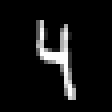

results (obj => dist): 5881 => 14.36, 35876 => 15.11, 35167 => 16.12, 1005 => 17.63, 46337 => 17.70, 4769 => 17.73, 53761 => 17.78, 14696 => 17.92, 48449 => 18.70, 25155 => 19.13, 35819 => 19.66, 54428 => 19.72, 18295 => 19.89, 18057 => 21.13, 6811 => 21.16

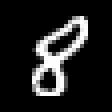

  0.111016 seconds (75.35 k allocations: 4.211 MiB, 61.16% compilation time)


results (obj => dist): 824 => 25.06, 20492 => 25.99, 9812 => 28.15, 1750 => 28.76, 59804 => 29.45, 58359 => 30.00, 46224 => 30.23, 58108 => 30.51, 30744 => 31.30, 35006 => 31.56, 49408 => 31.61, 15308 => 31.77, 44204 => 31.97, 11530 => 32.49, 53236 => 32.77

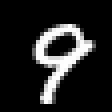

results (obj => dist): 42774 => 13.34, 15608 => 15.14, 38768 => 15.46, 9448 => 16.54, 41856 => 17.13, 55950 => 17.59, 17168 => 17.73, 24380 => 18.49, 57260 => 18.58, 22876 => 18.60, 20342 => 19.33, 47092 => 20.64, 13564 => 21.03, 5262 => 21.04, 32124 => 21.14

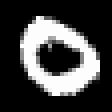

results (obj => dist): 14776 => 25.77, 14730 => 30.13, 41589 => 30.23, 57543 => 31.39, 28109 => 34.32, 32551 => 34.92, 28547 => 37.28, 10129 => 37.57, 14694 => 37.71, 23278 => 37.72, 31139 => 39.34, 49519 => 39.79, 14718 => 39.87, 14676 => 40.08, 14774 => 40.62

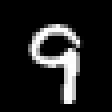

results (obj => dist): 38633 => 9.84, 30097 => 13.51, 9897 => 15.15, 55465 => 15.66, 35742 => 15.79, 9969 => 16.38, 26840 => 16.57, 38205 => 16.76, 20595 => 16.77, 27111 => 17.04, 20085 => 17.12, 26838 => 17.55, 56949 => 17.67, 56931 => 18.03, 1633 => 18.73

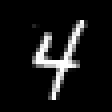

results (obj => dist): 25174 => 7.87, 58723 => 7.87, 3184 => 11.61, 29618 => 12.45, 44614 => 12.89, 56377 => 13.12, 25170 => 13.52, 35814 => 13.54, 1764 => 14.55, 3236 => 14.73, 40947 => 14.74, 6734 => 15.05, 42520 => 15.29, 58765 => 15.31, 29550 => 15.36

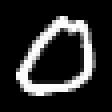

  0.019180 seconds
  0.019292 seconds
  0.019273 seconds
  0.019084 seconds
  0.019209 seconds


results (obj => dist): 17328 => 19.93, 6539 => 22.33, 26598 => 22.59, 32779 => 22.78, 33642 => 22.96, 44584 => 25.08, 1079 => 25.62, 40267 => 25.72, 37788 => 26.76, 28668 => 26.86, 18209 => 27.77, 39030 => 27.80, 21261 => 27.83, 45304 => 28.73, 34657 => 29.33

  0.019042 seconds


In [4]:
function sequential_search_demo()
    index = ExhaustiveSearch(SqL2Distance(), D.train_X)

    for q in rand(D.test_X, 7)
        display_one(q)
        @time res = search(index, q, 15)
        display_many(D.train_X[[p.id for p in res]])
        msg = [(@sprintf "%d => %0.2f" p.id p.dist) for p in res]
        display("text/html", "results (obj => dist): " * join(msg, ", "))
    end
    
    index
end

seq = sequential_search_demo();

## Searching with faster indexes
Fast exact indexes can be created using metric division strategies, but the faster ones some times are designed to retrieve an approximation of the solution. In any case, indexes for fast similarity search need to amortize the construction cost with a large number of queries. The following functions only exemplify the searching process, however, the number of queries is too small to show the typical case of use of these indexes.


## Solving queries with a proximity search graph
The `SearchGraph` is a faster index but with a more expensive construction.

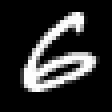

results (obj => dist): 10732 => 30.33, 10768 => 32.11, 5072 => 32.51, 53930 => 33.40, 41309 => 36.92, 41202 => 38.29, 10730 => 39.11, 37906 => 39.12, 17005 => 39.29, 2524 => 39.56, 35628 => 40.26, 59611 => 40.51, 56172 => 40.65, 57254 => 41.44, 5312 => 41.54

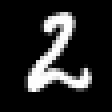

results (obj => dist): 27737 => 24.63, 47229 => 35.80, 50914 => 36.46, 21538 => 36.59, 14430 => 38.04, 42563 => 38.82, 34607 => 38.92, 10407 => 41.09, 6392 => 41.24, 11796 => 42.39, 51727 => 42.52, 11972 => 43.77, 39080 => 44.21, 49963 => 44.43, 39795 => 44.50

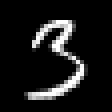

results (obj => dist): 38369 => 26.68, 21093 => 29.18, 52677 => 29.99, 13289 => 30.44, 38581 => 30.78, 6633 => 30.95, 9787 => 31.44, 56137 => 32.21, 32377 => 32.43, 27947 => 32.99, 48427 => 33.01, 54292 => 33.07, 42285 => 33.08, 57736 => 33.56, 56165 => 33.77

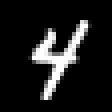

results (obj => dist): 59269 => 12.59, 59021 => 13.22, 16432 => 13.55, 3476 => 13.72, 58995 => 14.05, 21562 => 14.89, 3072 => 15.09, 26282 => 15.54, 22462 => 15.82, 33318 => 16.02, 41160 => 16.28, 58985 => 16.43, 50859 => 16.83, 11390 => 16.88, 21628 => 17.04

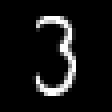

results (obj => dist): 10901 => 18.43, 32115 => 19.19, 35337 => 21.15, 56935 => 21.75, 7333 => 23.30, 16511 => 23.57, 29651 => 25.16, 6544 => 26.15, 26551 => 26.17, 38038 => 26.42, 22461 => 26.63, 28345 => 26.87, 47819 => 26.89, 39067 => 27.10, 36049 => 27.15

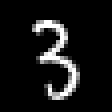

results (obj => dist): 30355 => 15.48, 17289 => 16.73, 33433 => 17.72, 25285 => 17.95, 32285 => 19.09, 17353 => 19.53, 49567 => 19.71, 35543 => 21.57, 26489 => 21.75, 44581 => 22.10, 12507 => 22.20, 137 => 22.48, 21967 => 22.77, 14637 => 22.81, 49143 => 22.87

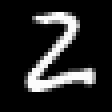

results (obj => dist): 32679 => 19.71, 32873 => 29.03, 7511 => 32.47, 31971 => 36.24, 32846 => 37.08, 24431 => 37.14, 18118 => 37.16, 58488 => 37.99, 57449 => 39.10, 26238 => 39.13, 53368 => 39.26, 57891 => 40.00, 57443 => 40.29, 34559 => 40.95, 22923 => 41.33

 26.283711 seconds (1.57 M allocations: 105.953 MiB, 5.66% compilation time)
  0.000301 seconds
  0.000306 seconds
  0.000575 seconds
  0.000412 seconds
  0.000732 seconds
  0.000507 seconds
  0.000283 seconds


In [5]:
function searchgraph_search_demo()
    # a real index only works whenever the number of queries amortizes the construction cost
    @time index = SearchGraph(SqL2Distance(), D.train_X, verbose=false)
    for q in rand(D.test_X, 7)
        display_one(q)
        @time res = search(index, q, 15)
        display_many([D.train_X[p.id] for p in res])
        msg = [(@sprintf "%d => %0.2f" p.id p.dist) for p in res]
        display("text/html", "results (obj => dist): " * join(msg, ", "))
    end
    
    index
end

sgraph = searchgraph_search_demo();

## A simple KNN classifier
Lets create a classifier to measure the performance and the quality impact of the different indexes

In [8]:
function classify(index, k=1)
    ypred = []
    @time for i in eachindex(D.test_X)
        res = search(index, D.test_X[i], KnnResult(k))
        if k == 1
            push!(ypred, D.train_y[first(res).id])
        else
            labels = D.train_y[[p.id for p in res]]
            c = counts(labels, 1:10)
            push!(ypred, findmax(c)[end])
        end
    end
    
    display("text/html", "$(k)NN-classifier $(typeof(index)), accuracy: $(mean(ypred .== D.test_y))")
end


classify (generic function with 2 methods)

In [9]:
@time classify(seq)
@time classify(sgraph)

1NN-classifier ExhaustiveSearch{SqL2Distance, Vector{Matrix{Float32}}}, accuracy: 0.9691

189.323080 seconds (94.05 k allocations: 3.760 MiB, 0.01% compilation time)


1NN-classifier SearchGraph{SqL2Distance, Vector{Matrix{Float32}}, BeamSearch, LogNeighborhood}, accuracy: 0.8045

  1.863682 seconds (88.95 k allocations: 3.745 MiB, 0.23% compilation time)


### Optimizing the index for speed
As commented, it is possible to trade quality by speed, and this can be made not just for different indexes. 

In [14]:
for recall in [0.3, 0.6, 0.8, 0.95, 0.99]
    perf = Performance(ExhaustiveSearch(sgraph.dist, sgraph.db), rand(sgraph.db, 100), 7; popnearest=true)
    optimize!(perf, sgraph, recall=recall, verbose=true)
    display("text/html", "testing for recall $recall")
    classify(sgraph)
end


testing for recall 0.3

1NN-classifier SearchGraph{SqL2Distance, Vector{Matrix{Float32}}, BeamSearch, LogNeighborhood}, accuracy: 0.8718

testing for recall 0.6

  1.780077 seconds (88.92 k allocations: 3.776 MiB)


1NN-classifier SearchGraph{SqL2Distance, Vector{Matrix{Float32}}, BeamSearch, LogNeighborhood}, accuracy: 0.8434

testing for recall 0.8

  1.250594 seconds (88.93 k allocations: 3.776 MiB)


1NN-classifier SearchGraph{SqL2Distance, Vector{Matrix{Float32}}, BeamSearch, LogNeighborhood}, accuracy: 0.8305

testing for recall 0.95

  1.190084 seconds (88.93 k allocations: 3.776 MiB)


1NN-classifier SearchGraph{SqL2Distance, Vector{Matrix{Float32}}, BeamSearch, LogNeighborhood}, accuracy: 0.8481

testing for recall 0.99

  1.286426 seconds (88.92 k allocations: 3.776 MiB)


1NN-classifier SearchGraph{SqL2Distance, Vector{Matrix{Float32}}, BeamSearch, LogNeighborhood}, accuracy: 0.8686

  1.733634 seconds (88.92 k allocations: 3.776 MiB)


Please note that there is no real change in the accuracy; and therefore, the speed is barely modified. However, this is the standard procedure to optimize the search speed on an already constructed SearchGraph index.


## Changing the distance function on-the-go

It is possible to use different distance functions over an already created index; some indexes will work fine, taking a little different notion of similarity while searching. Note that the expected performance could change. However, it allows us to explore rapidly over new similarity measures or functions computationally more expensive (preventing that creating the index become a time cons procedure).

In the following examples, we use non-linear functions that barely improve over the Euclidean distance; nevertheless, these exercise exemplifies that it is possible to hand tune a distance function on-the-go.

In [20]:
struct D1 <: PreMetric
end

function SimilaritySearch.evaluate(::D1, a, b)
    d = 0.0
    @inbounds @fastmath @simd for i in 1:length(a)
        m = abs(a[i] - b[i])
        if m > 0.3
            d += m^5
        end
    end
    
    d #sqrt(d)
end

display("text/markdown", "### Predicting with a more costly distance")

for k in [1, 3, 5, 7, 9, 11]
    classify(copy(sgraph, dist=D1()), k)
end



### Predicting with a more costly distance

1NN-classifier SearchGraph{D1, Vector{Matrix{Float32}}, BeamSearch, LogNeighborhood}, accuracy: 0.8813

  3.181305 seconds (289.48 k allocations: 14.641 MiB, 7.96% compilation time)


3NN-classifier SearchGraph{D1, Vector{Matrix{Float32}}, BeamSearch, LogNeighborhood}, accuracy: 0.9376

  3.532592 seconds (119.00 k allocations: 7.592 MiB)


5NN-classifier SearchGraph{D1, Vector{Matrix{Float32}}, BeamSearch, LogNeighborhood}, accuracy: 0.95

  3.510427 seconds (119.00 k allocations: 8.050 MiB)


7NN-classifier SearchGraph{D1, Vector{Matrix{Float32}}, BeamSearch, LogNeighborhood}, accuracy: 0.9528

  3.545401 seconds (119.00 k allocations: 8.355 MiB)


9NN-classifier SearchGraph{D1, Vector{Matrix{Float32}}, BeamSearch, LogNeighborhood}, accuracy: 0.9556

  3.617537 seconds (119.00 k allocations: 8.813 MiB)


11NN-classifier SearchGraph{D1, Vector{Matrix{Float32}}, BeamSearch, LogNeighborhood}, accuracy: 0.9565

  3.699619 seconds (119.00 k allocations: 9.118 MiB)


# Conclusions
In this tutorial we reviwed how to create a simple search by content indexes for the MNIST dataset.
We also present the difference in performance among three different structures while quality is traded by speed
using the search indexes as KNN classifiers. 
Finally, we shown how to use a different distance functions to hand tune the classifier.  